# Exploratory Data Analysis Part 1

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For times:
import time

# Set a random seed for imputation
#  Source:  https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Read Data and Examine Dataframe

In [2]:
listings = pd.read_csv('../data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20230319180919,2023-03-19,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.88,4.53,4.74,Approved by the government,f,10,10,0,0,0.69
2,6695,https://www.airbnb.com/rooms/6695,20230319180919,2023-03-19,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.96,4.50,4.72,STR446650,f,10,10,0,0,0.74
3,8789,https://www.airbnb.com/rooms/8789,20230319180919,2023-03-20,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.96,4.96,4.56,NaN,f,7,7,0,0,0.24
4,4765070,https://www.airbnb.com/rooms/4765070,20230319180919,2023-03-19,city scrape,Studio w/ private entrance and bathroom,Private Studio located in Boston (town of Jama...,"Jamaica Plain (JP) is an open, artsy, hip neig...",https://a0.muscache.com/pictures/miso/Hosting-...,24584716,...,4.85,4.48,4.69,str-416042,t,1,1,0,0,3.77


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3864 non-null   int64  
 1   listing_url                                   3864 non-null   object 
 2   scrape_id                                     3864 non-null   int64  
 3   last_scraped                                  3864 non-null   object 
 4   source                                        3864 non-null   object 
 5   name                                          3864 non-null   object 
 6   description                                   3846 non-null   object 
 7   neighborhood_overview                         2497 non-null   object 
 8   picture_url                                   3864 non-null   object 
 9   host_id                                       3864 non-null   i

In [4]:
pd.DataFrame(listings.isnull().sum().sort_values(ascending=False))[listings.isnull().sum() >0]

C:\Users\Dan\AppData\Local\Temp\ipykernel_30320\3428758067.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(listings.isnull().sum().sort_values(ascending=False))[listings.isnull().sum() >0]


,0
neighbourhood_group_cleansed,3864
bathrooms,3864
calendar_updated,3864
license,1559
neighborhood_overview,1367
neighbourhood,1367
review_scores_value,1132
review_scores_location,1132
review_scores_checkin,1132
review_scores_accuracy,1131


In [5]:
# Print the colums for simple copy and paste
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Create a Hold-out (Testing) Dataset to be Used Later
* Approximately ten percent of the data in the provided dataset will be reserved
* Separate .csv files will be created for the training and testing sets
* The 'training' set will later be split into training and validation datasets
* The intent of this step is to prevent data leakage

In [6]:
# Split the data accordingly
training, testing = train_test_split(listings, test_size = 0.1, random_state = 42)

# Reset the indexes
training.reset_index(drop = True, inplace=True)
testing.reset_index(drop = True, inplace=True)

# Save files to .csv
training.to_csv('../data/listings_train.csv')
testing.to_csv('../data/listings_test.csv')

# Create EDA Functions

In [7]:
# Create a histogram plotting function:
def hist_plotter(data, title = None, x_lbl = None, y_lbl = 'Count',  size = (6,4), bins = None, log = False):
    plt.figure(figsize = size)
    plt.hist(data, bins = bins, log = log)
    if title == None:
        plt.title(f'{data.name}')
    else:
        plt.title(title)
    if x_lbl == None:
        plt.xlabel(f'{data.name}')
    else:
        plt.xlabel(x_lbl) 
    plt.ylabel(y_lbl)

In [8]:
# Create a function to plot one numerical column versus another
def plot_vs(data_x, data_y, title = None, x_lbl = None, y_lbl = None, size = (6,4), x_log = None, y_log = None):
    plt.figure(figsize = size)
    plt.scatter(data_x, data_y)
    if title == None:
        plt.title(f'{data_y.name} vs. {data_x.name}')
    else:
        plt.title(title)

    if x_lbl == None:
        plt.xlabel(f'{data_x.name}')
    else:
        plt.xlabel(x_lbl) 

    if y_lbl == None:
        plt.ylabel(f'{data_y.name}')
    else:
        plt.ylabel(y_lbl)

    if x_log != None:
        plt.xscale(x_log)
        
    if y_log != None:
        plt.yscale(y_log)

In [9]:
#np.corrcoef(lstn.price, lstn.review_scores_rating)

In [10]:
#plot_vs_log(lstn.price, lstn.review_scores_rating)

In [11]:
# Create a more advanced 'plot vs' function which examines logs too

def plot_vs_log(data_x, data_y, title = None, x_lbl = None, y_lbl = None, size = (15,4), x_log = None, y_log = None):
    
    # calculate the correlations
    #  Source for correlation:  https://www.educative.io/answers/what-is-the-statistics-correlation-method-in-python
    
    # NaNs need to be dropped, in doing that, the array dimensions mmust match
    #  To do that, indices will be compared to get the intersection of index values
    base_corr = round(pd.DataFrame([data_x, data_y]).T.corr().iloc[0][1], 3)
    
    
    #base_corr = round(np.corrcoef(data_x.dropna(), data_y.dropna())[0][1], 3)
    
    plt.figure(figsize = size)
    
    # Untransformed variables
    plt.subplot(1, 3, 1)
    plt.scatter(data_x, data_y)
    if title == None:
        plt.title(f'{data_y.name} \nvs. {data_x.name} \ncorr: {base_corr}')
    else:
        plt.title(title)

    if x_lbl == None:
        plt.xlabel(f'{data_x.name}')
    else:
        plt.xlabel(x_lbl) 

    if y_lbl == None:
        plt.ylabel(f'{data_y.name}')
    else:
        plt.ylabel(y_lbl)

    if x_log != None:
        plt.xscale(x_log)
        
    if y_log != None:
        plt.yscale(y_log)
    
    
    # Log transform y (adjust the axis scale)
    plt.subplot(1, 3, 2)
    plt.scatter(data_x, data_y)
    if title == None:
        plt.title(f'Log {data_y.name} \nvs. {data_x.name}')
    else:
        plt.title(title)

    if x_lbl == None:
        plt.xlabel(f'{data_x.name}')
    else:
        plt.xlabel(x_lbl) 

    if y_lbl == None:
        plt.ylabel(f'log {data_y.name}')
    else:
        plt.ylabel(y_lbl)

    if x_log != None:
        plt.xscale(x_log)
        
    plt.yscale('log')

    # Log transform BOTH x and y (adjust the axis scales)
    plt.subplot(1, 3, 3)
    plt.scatter(data_x, data_y)
    if title == None:
        plt.title(f'Log {data_y.name} \nvs. Log {data_x.name}')
    else:
        plt.title(title)

    if x_lbl == None:
        plt.xlabel(f'log {data_x.name}')
    else:
        plt.xlabel(x_lbl) 

    if y_lbl == None:
        plt.ylabel(f'log {data_y.name}')
    else:
        plt.ylabel(y_lbl)

    plt.xscale('log')
    plt.yscale('log')

In [58]:
# This function will attempt to convert a string percentage value into a float
#  Source for help:  https://www.w3schools.com/python/python_try_except.asp
def pcnt_floater(x):
    try:
        return float(x.replace('%', '').strip())
    except:
        return x

## Data Dictionary Reivew and Initial Column Drop
The data dictionary for this data can be found [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).

As the target variable is price, columns will be remvoed which:
* Are clerical in nature
* Could not possibly relate to the price in the state that they are in
* Are mostly or entirely nulls values

In [12]:
# Create a new dataframe with columns dropped
# Make a copy so as not to affect the original data
lstn = training.drop(columns = [
    'listing_url', 'scrape_id', 'last_scraped', 'source',
    'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'neighbourhood','neighbourhood_group_cleansed', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
    'calendar_last_scraped', 'bathrooms', 'first_review', 'last_review'
]).copy()

In [13]:
lstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3477 non-null   int64  
 1   name                                          3477 non-null   object 
 2   description                                   3464 non-null   object 
 3   neighborhood_overview                         2245 non-null   object 
 4   host_id                                       3477 non-null   int64  
 5   host_since                                    3477 non-null   object 
 6   host_location                                 2683 non-null   object 
 7   host_about                                    2463 non-null   object 
 8   host_response_time                            3011 non-null   object 
 9   host_response_rate                            3011 non-null   o

In [14]:
# List the columns for easy copy and paste later
lstn.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value

## Explore the Target Varible:  Price

In [15]:
lstn.price.describe()

count        3477
unique        503
top       $150.00
freq           58
Name: price, dtype: object

In [16]:
# Right now, the price is encoded as an object.  Conver to float for stats analysis
lstn.price = lstn.price.apply(lambda x: float(x.replace('$','').replace(',','').strip()))

In [17]:
lstn.price.describe()

count     3477.000000
mean       191.704918
std        260.634048
min          0.000000
25%         85.000000
50%        149.000000
75%        226.000000
max      10000.000000
Name: price, dtype: float64

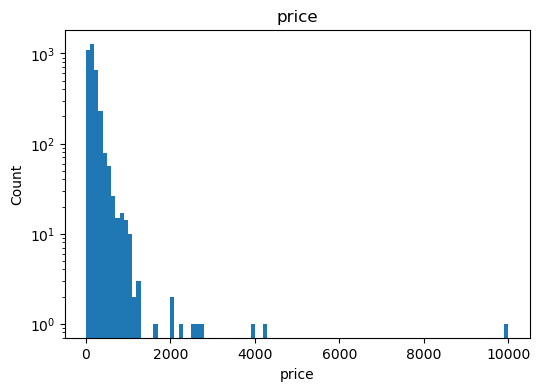

In [18]:
# Plot a 
hist_plotter(lstn.price, bins = 100, log = True)

In [19]:
'''
To take the log of the price data, the $0 listings must first be
imputed with some value that can be log-transformed.

All $0 listings will be imputed with 1 as $1 is basically $0 in
terms of Air BnBs.
''';

# See how many listings are $0
print('Number of $0 listings: ', sum(lstn.price == 0))

# Impute 1 for 0 where price is 0 and take the log
#  Help with this code from:  https://www.geeksforgeeks.org/how-to-use-if-else-elif-in-python-lambda-functions/
log_price = np.log(lstn.price.apply(lambda x: 1 if x==0 else x))

Number of $0 listings:  1


In [20]:
lstn.price[0]

175.0

In [21]:
log_price

0       5.164786
1       3.583519
2       4.744932
3       5.056246
4       5.459586
          ...   
3472    4.844187
3473    4.948760
3474    4.356709
3475    4.094345
3476    6.214608
Name: price, Length: 3477, dtype: float64

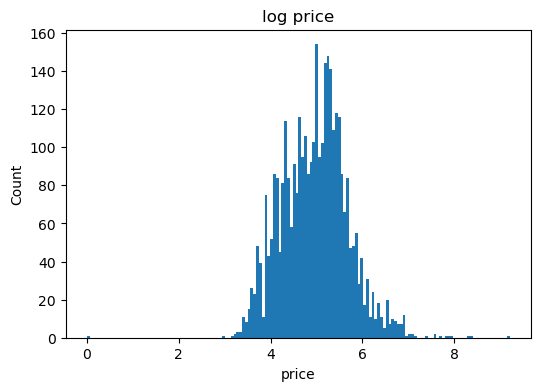

In [22]:
hist_plotter(log_price, title = 'log price', bins = 150)

#### OBSERVATIONS:
* Taking the logarithm of the price data helps to normalize its distribution

# Examine Possible Features

## Explore Numerical Features

In [23]:
# Source for this code: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
#  The host and listing ids need to be dropped to make this table more human readable (get rid of scientific notation)
lstn.drop(columns = ['id', 'host_id'])._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,3477.0,478.265746,1349.140443,1.000000,2.00000,12.00000,84.00000,4807.00000
host_total_listings_count,3477.0,636.246189,1517.960227,1.000000,3.00000,17.00000,127.00000,5358.00000
latitude,3477.0,42.337493,0.027111,42.235300,42.32187,42.34472,42.35431,42.39228
longitude,3477.0,-71.082429,0.033393,-71.173486,-71.10049,-71.07316,-71.06081,-70.99600
accommodates,3477.0,3.181478,2.206180,1.000000,2.00000,2.00000,4.00000,16.00000
bedrooms,3061.0,1.749102,1.203659,1.000000,1.00000,1.00000,2.00000,13.00000
beds,3399.0,1.794940,1.438771,1.000000,1.00000,1.00000,2.00000,22.00000
price,3477.0,191.704918,260.634048,0.000000,85.00000,149.00000,226.00000,10000.00000
minimum_nights,3477.0,30.772505,39.852328,1.000000,2.00000,25.00000,32.00000,600.00000
maximum_nights,3477.0,670.524878,452.549044,2.000000,365.00000,366.00000,1125.00000,1125.00000


C:\Users\Dan\AppData\Local\Temp\ipykernel_30320\2697494567.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = size)


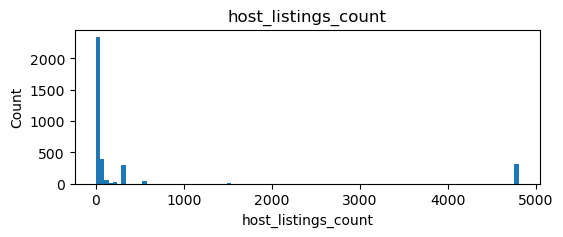

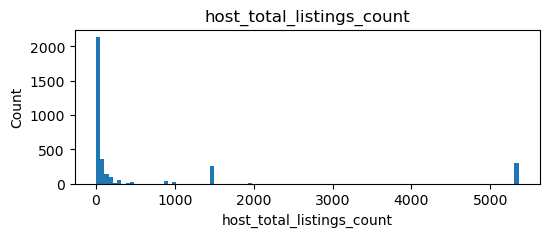

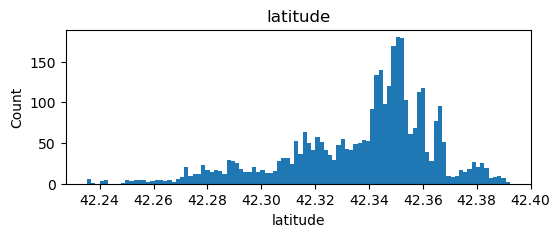

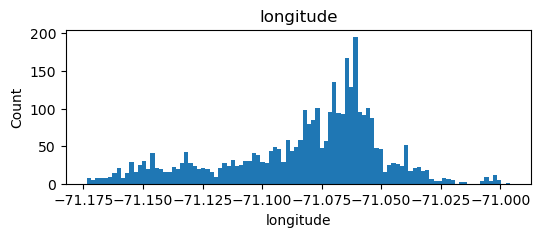

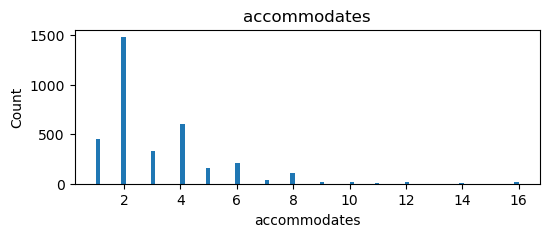

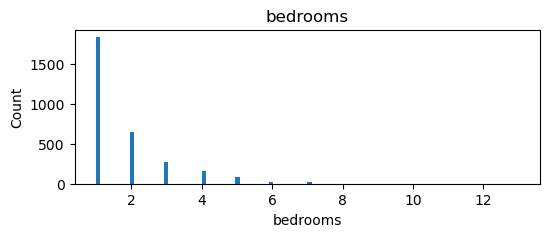

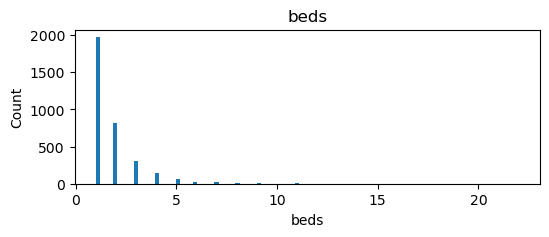

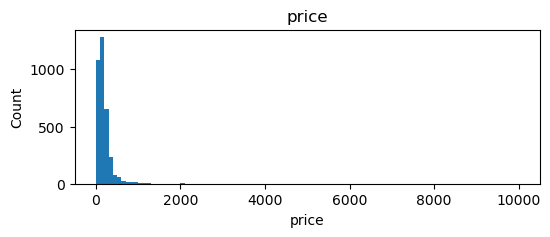

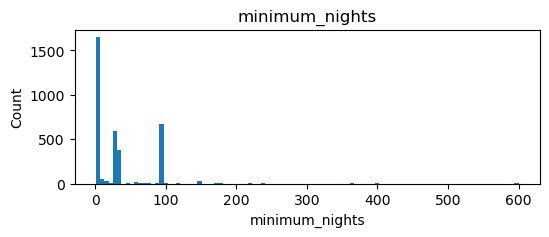

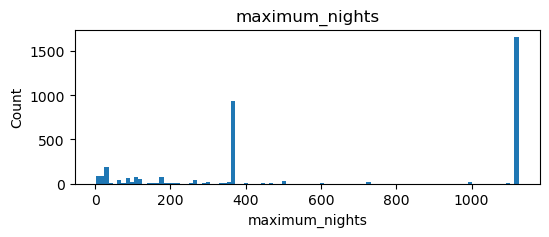

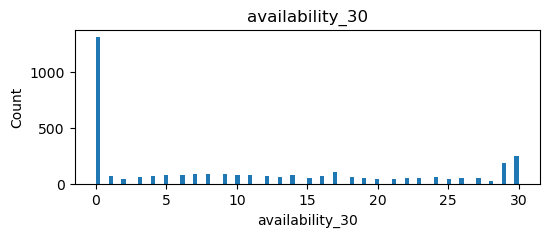

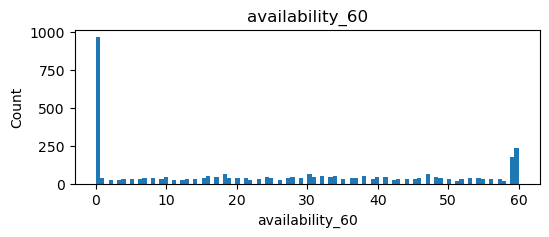

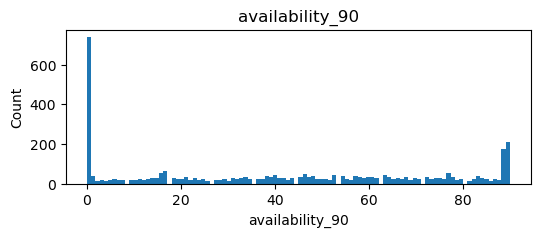

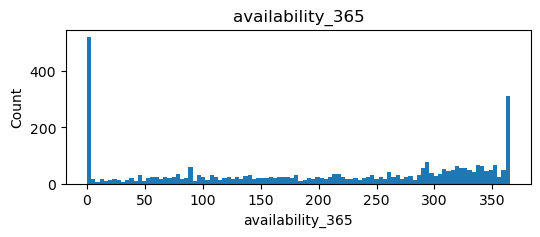

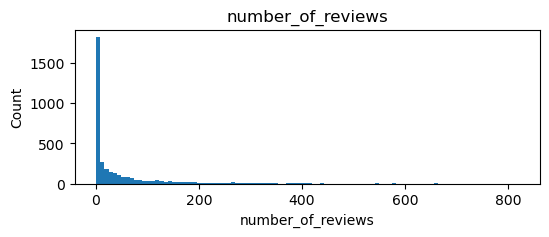

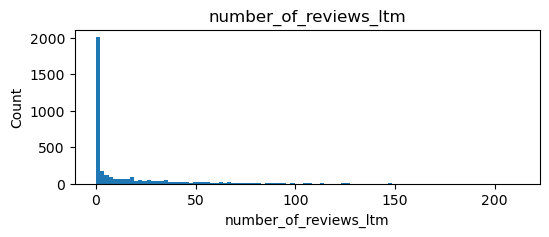

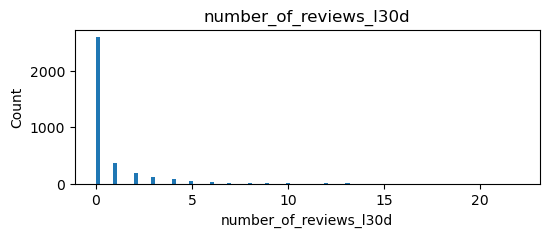

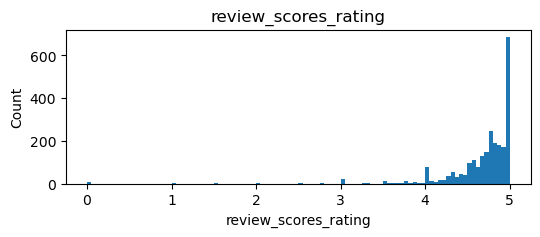

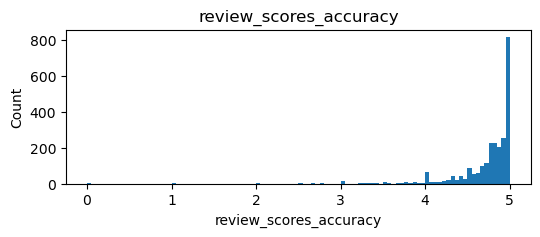

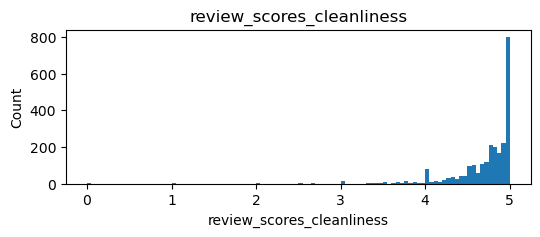

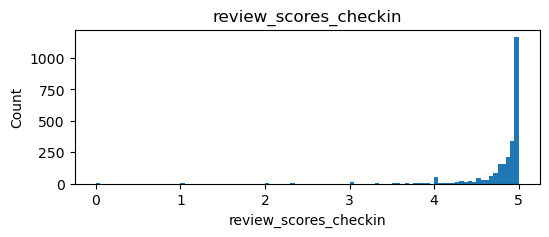

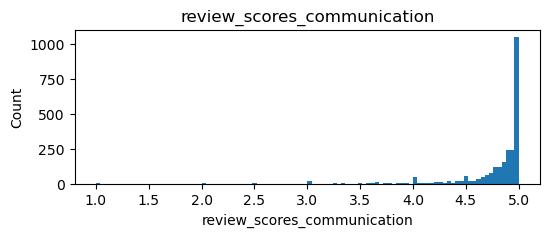

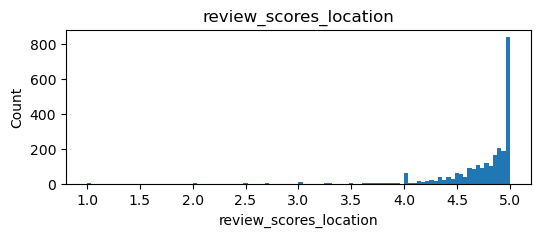

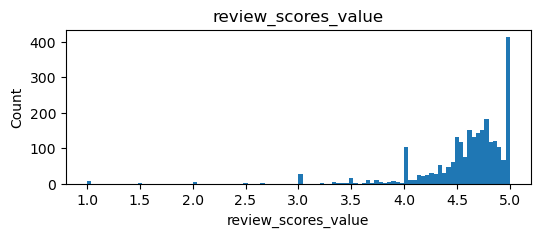

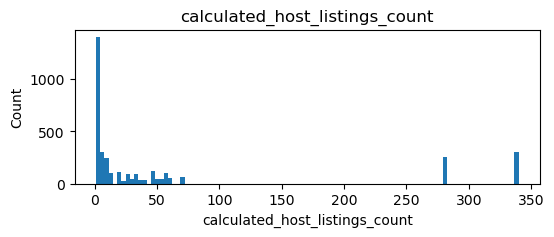

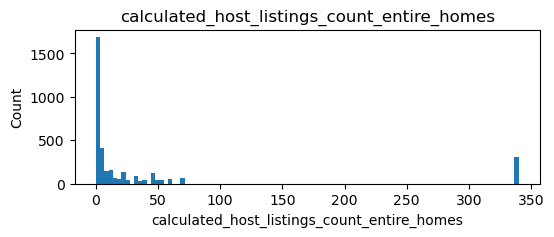

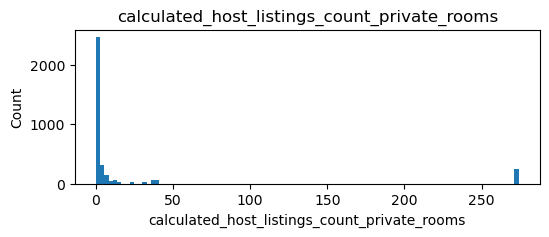

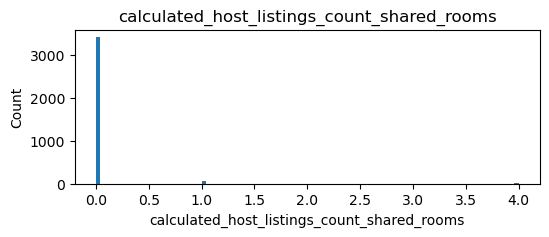

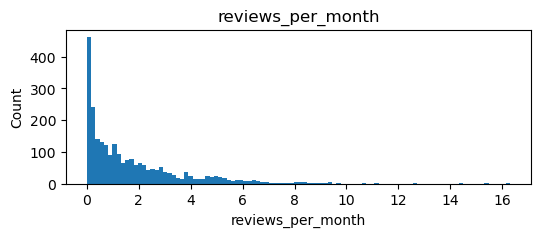

In [24]:
num_cols = lstn.drop(columns = ['id', 'host_id'])._get_numeric_data().columns

for i in num_cols:
    hist_plotter(lstn[i], size = (6,2), bins = 100)

#### OBSERVATIONS:
Not all numerical columns will be commented on.  Some intersting insights are as follows:
* Odd numbers for the 'accomodates' feature appear to be more frequent.  Probably due to home design and people traveling in couples
    * It might be good to one hot encode this variable
* The minimum available nights appear to be relatively low, but peak around 0 (or probably 1) days, 30days, and 90 days
    * This may also be a good feature to one hot encode or bin
* Reviews in-general tend to be very high, many of them being over 4.5
    * It may be good to bucketize these ratings by quantiles in order to understand what's going on
    * This may be especailly usefult for the 'value' reviews
* The count of host listings may also indicate why type of host is posting a particular listing
    * The type of host may then have something to do with the price
    * For this it would also be useful to calcualte percentages of each type of listing as this may also indicate the type of host

C:\Users\Dan\AppData\Local\Temp\ipykernel_30320\108076237.py:83: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
C:\Users\Dan\AppData\Local\Temp\ipykernel_30320\108076237.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = size)


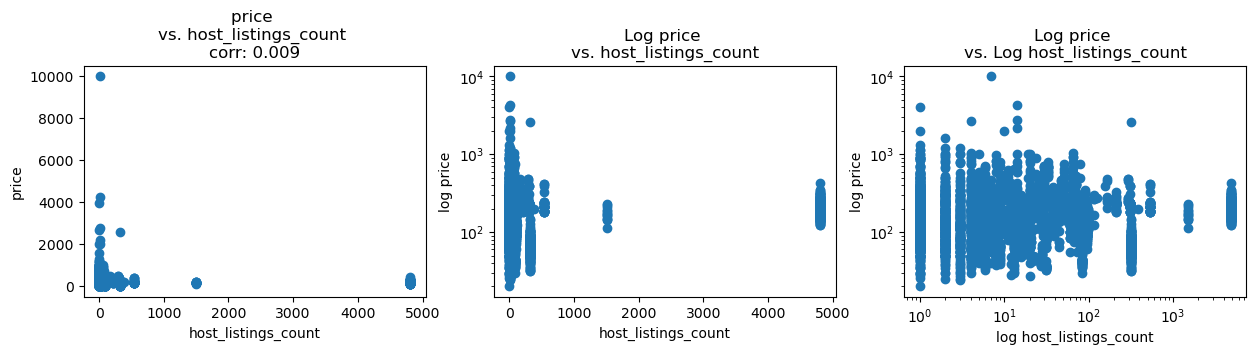

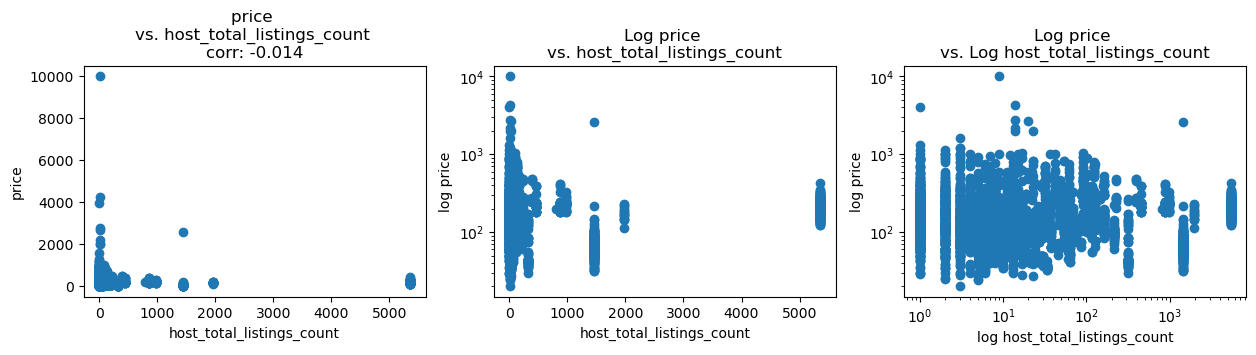

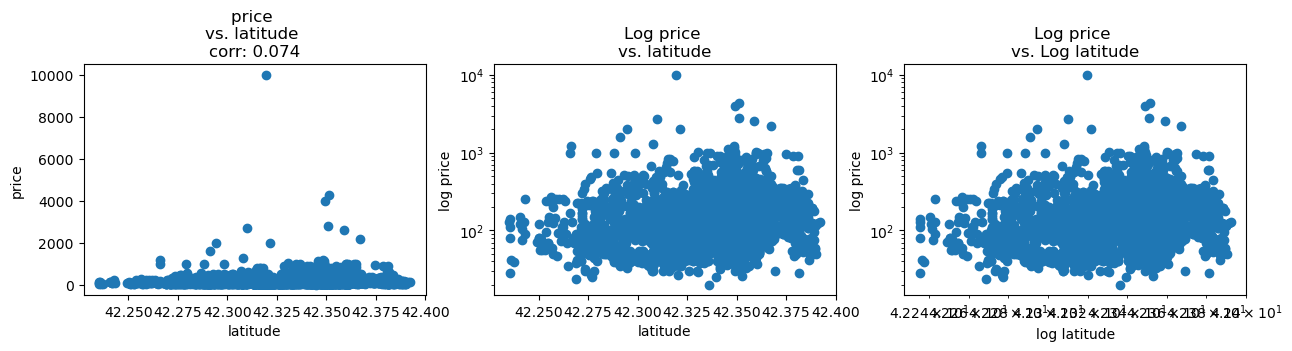

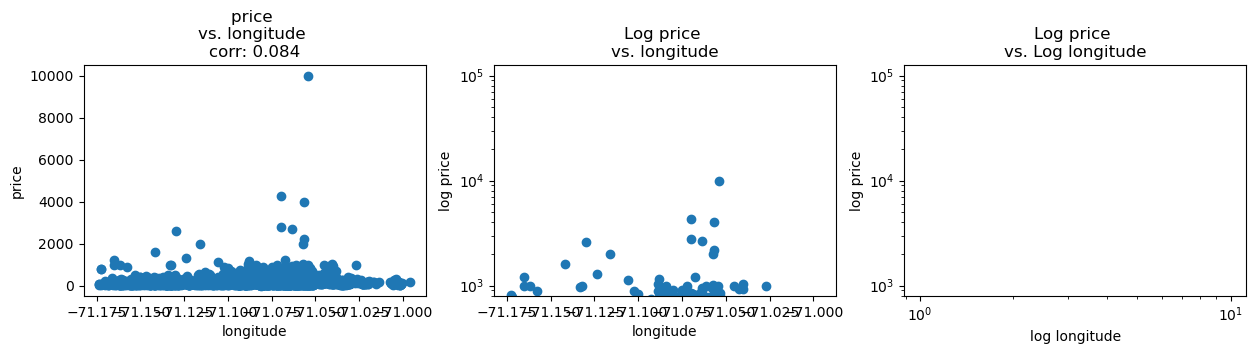

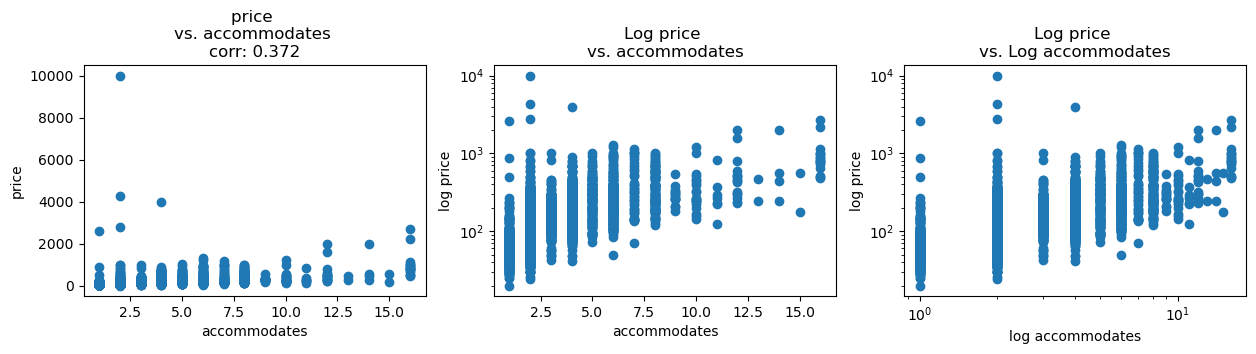

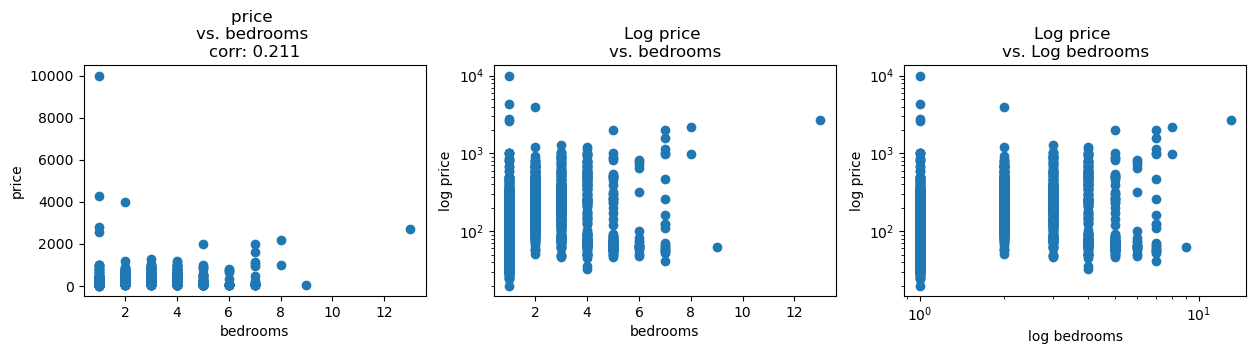

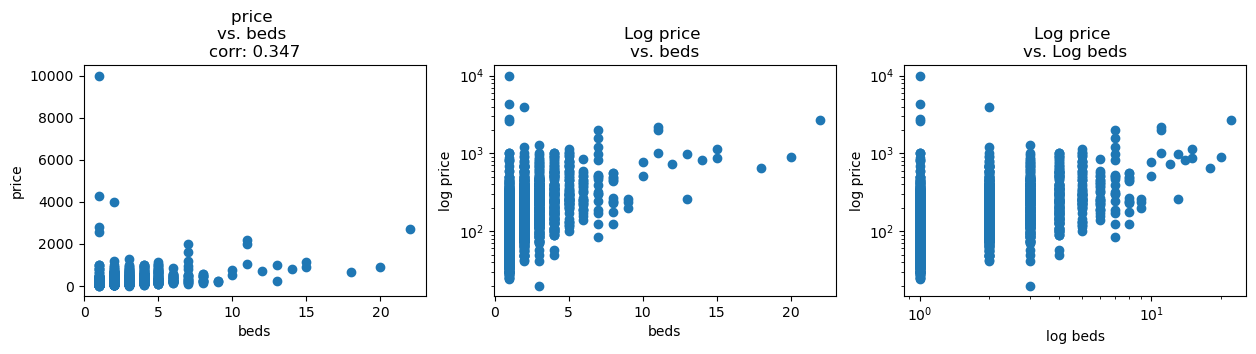

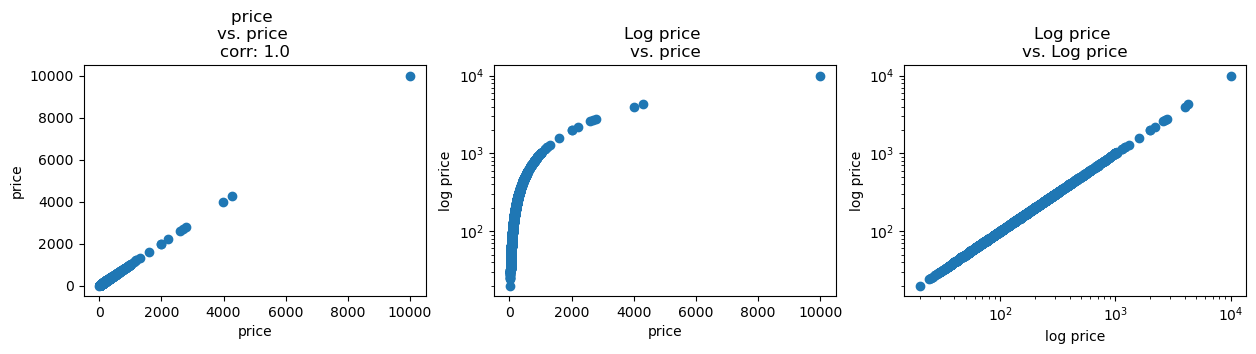

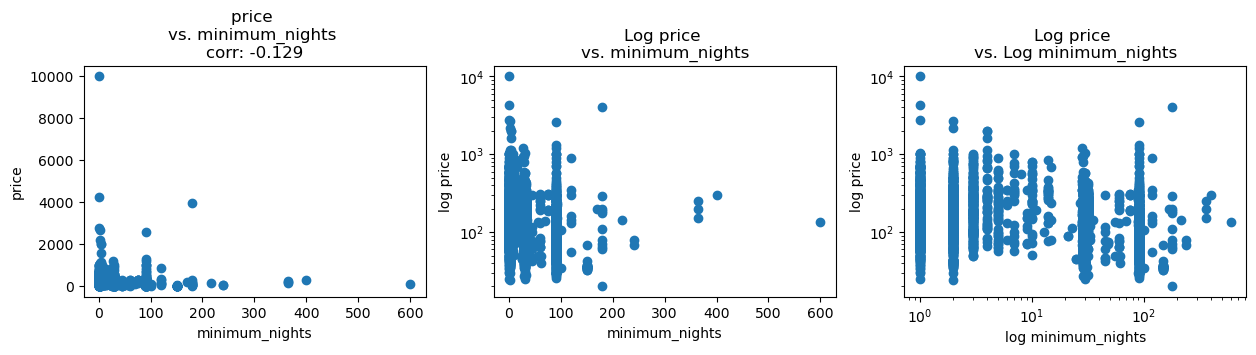

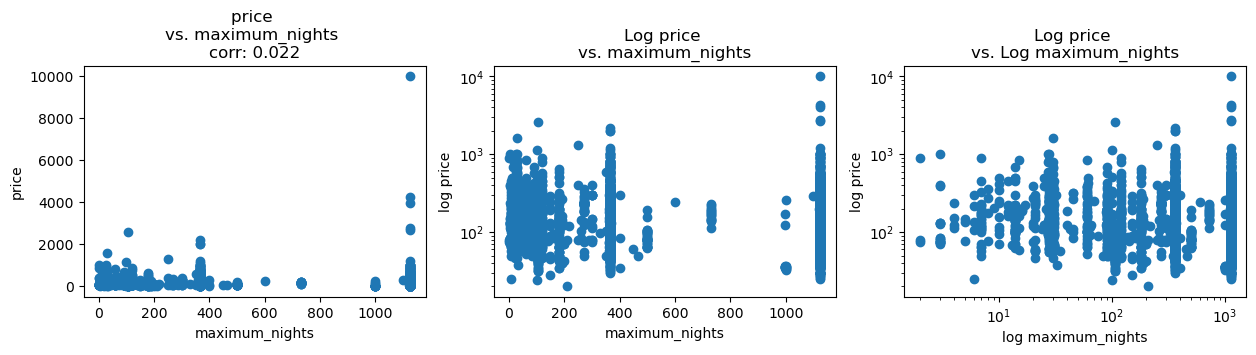

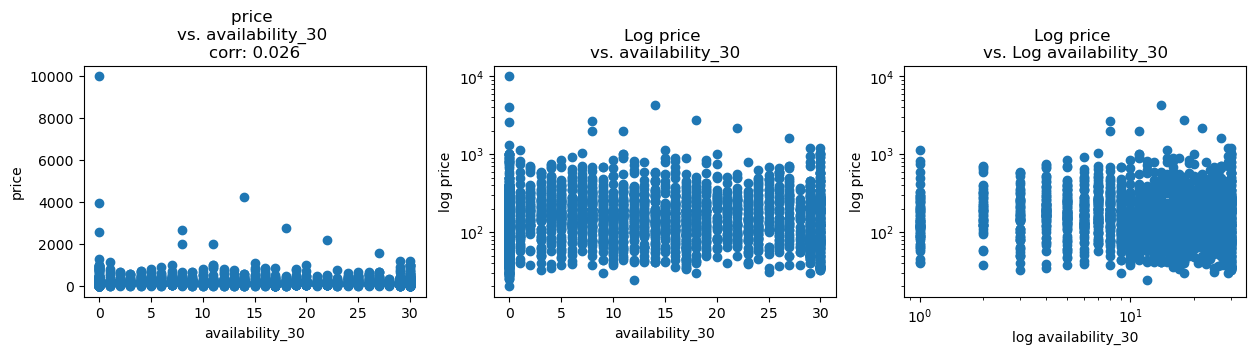

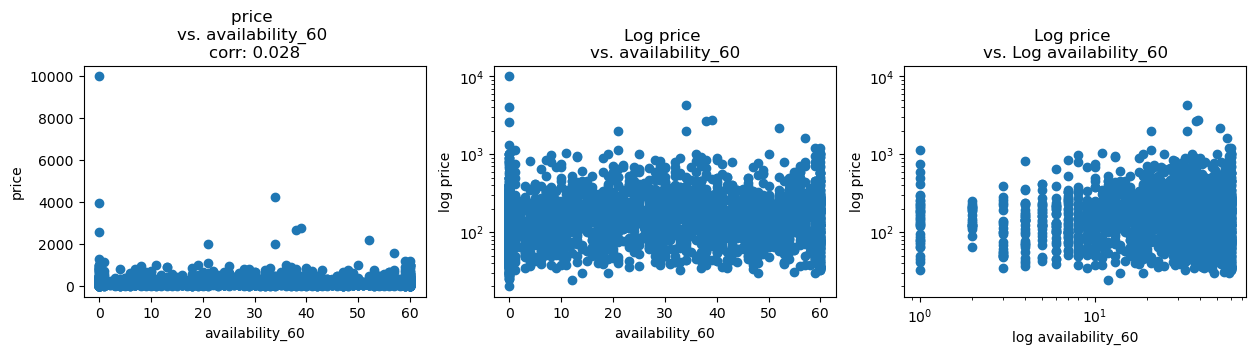

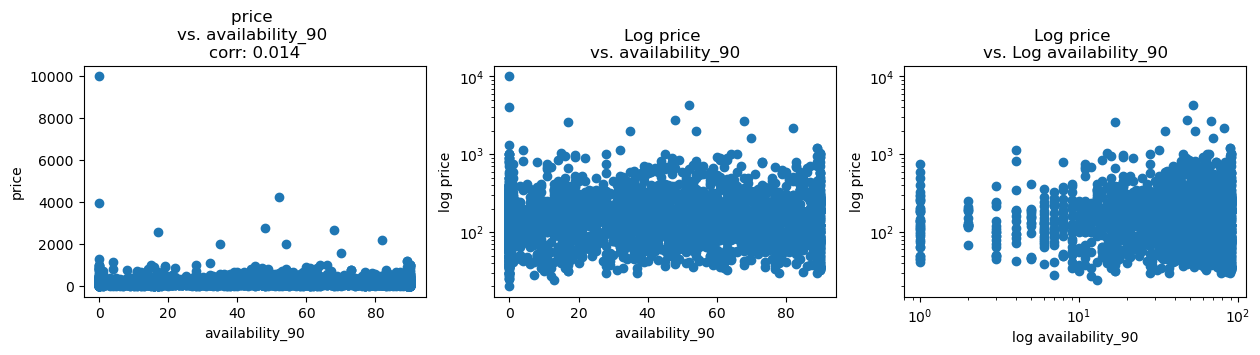

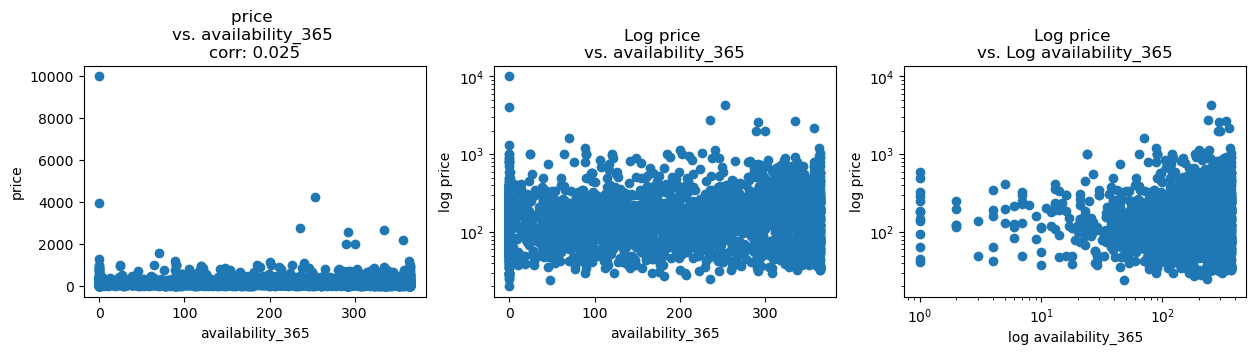

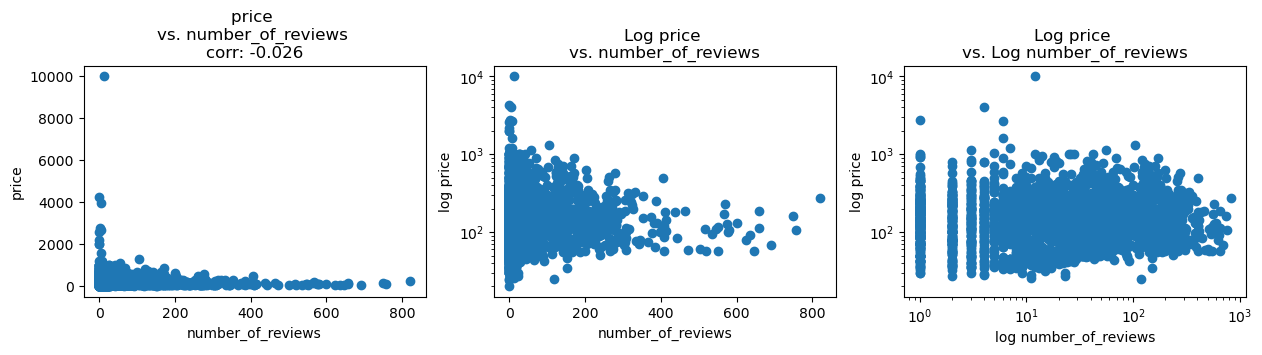

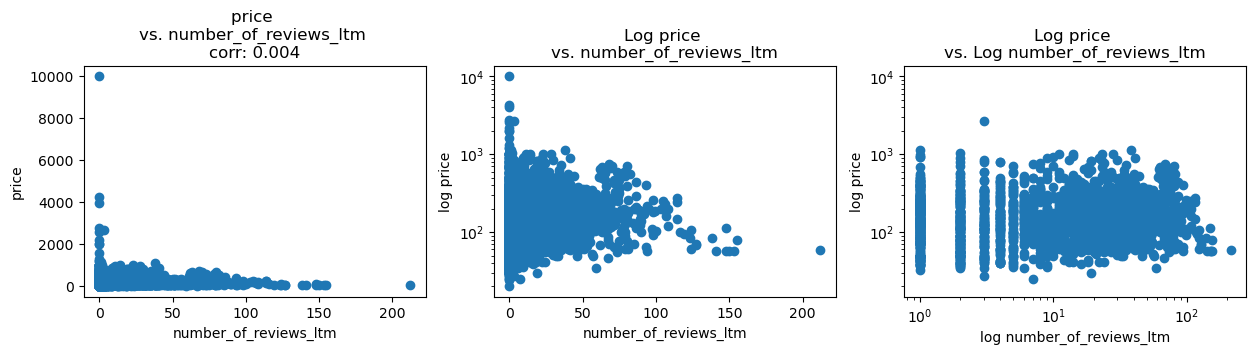

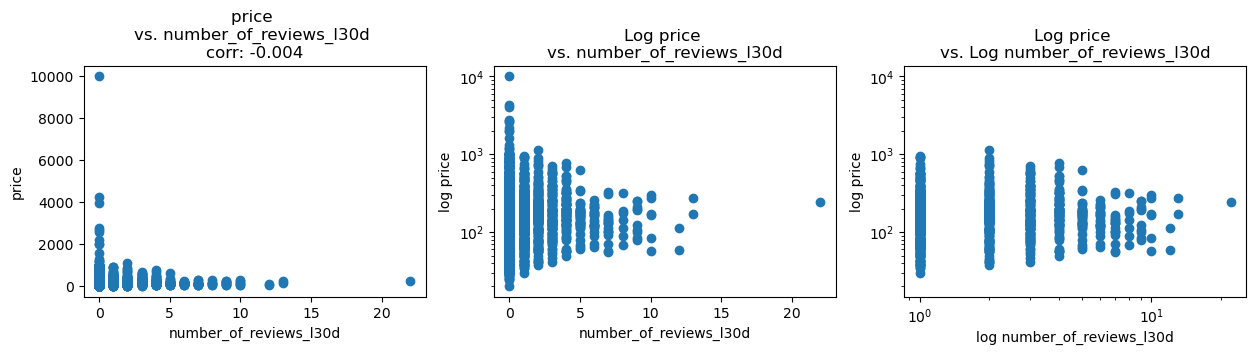

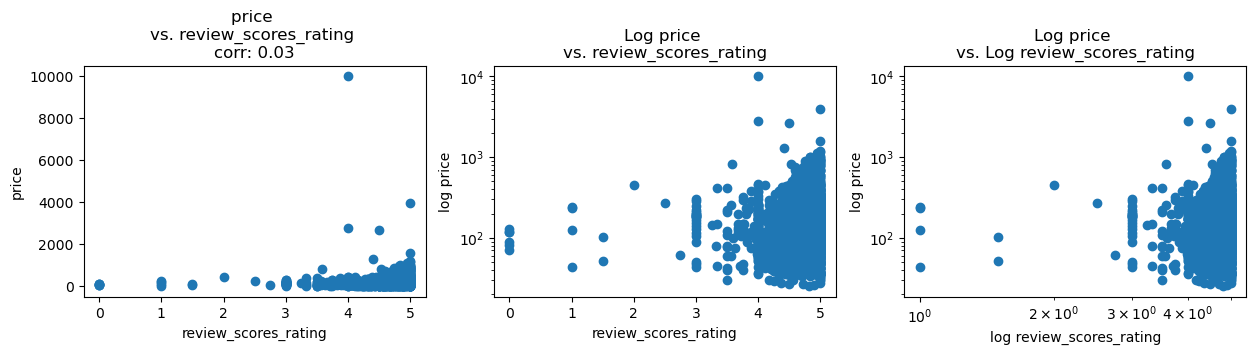

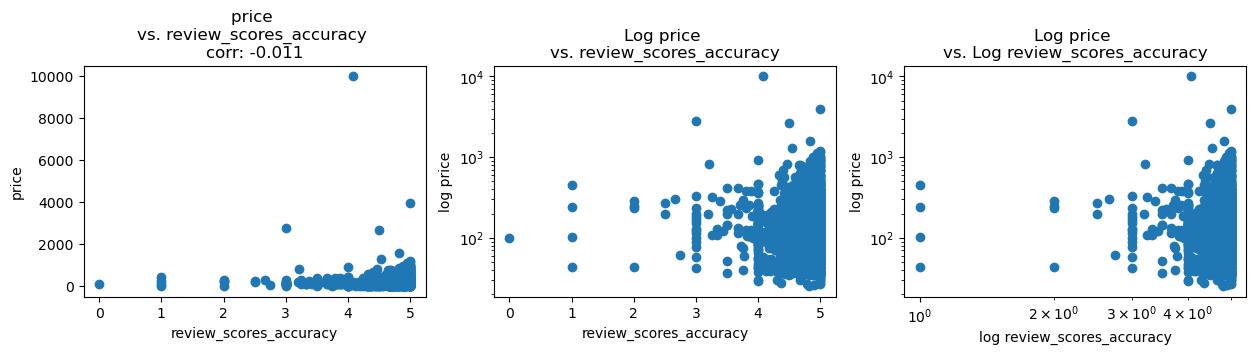

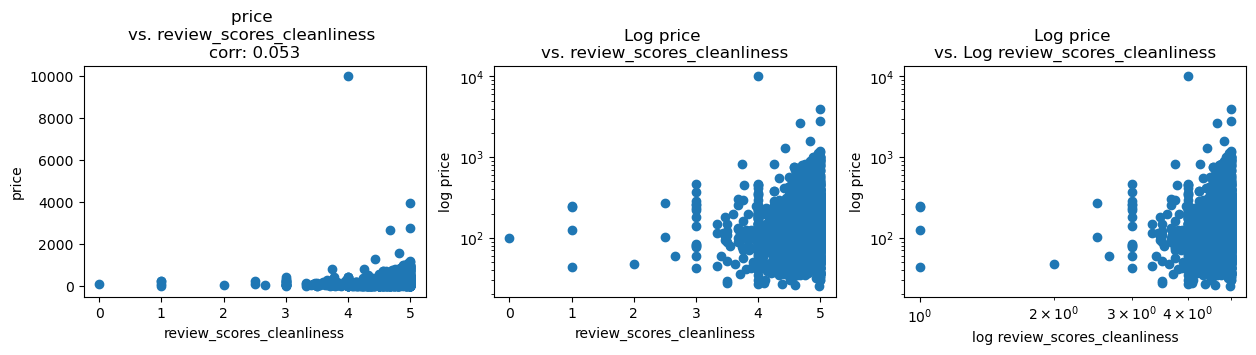

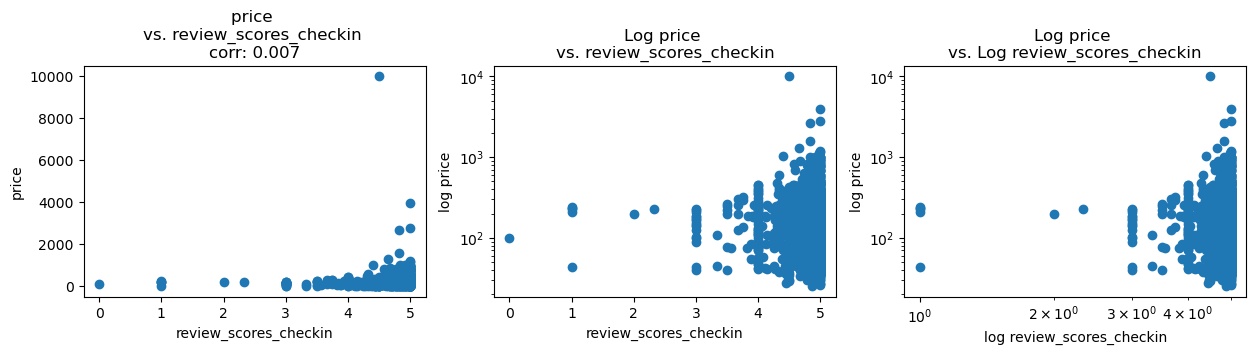

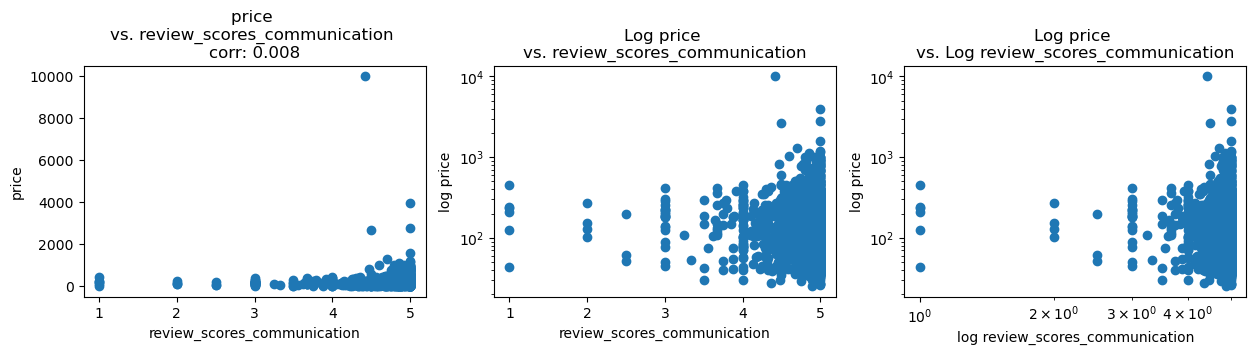

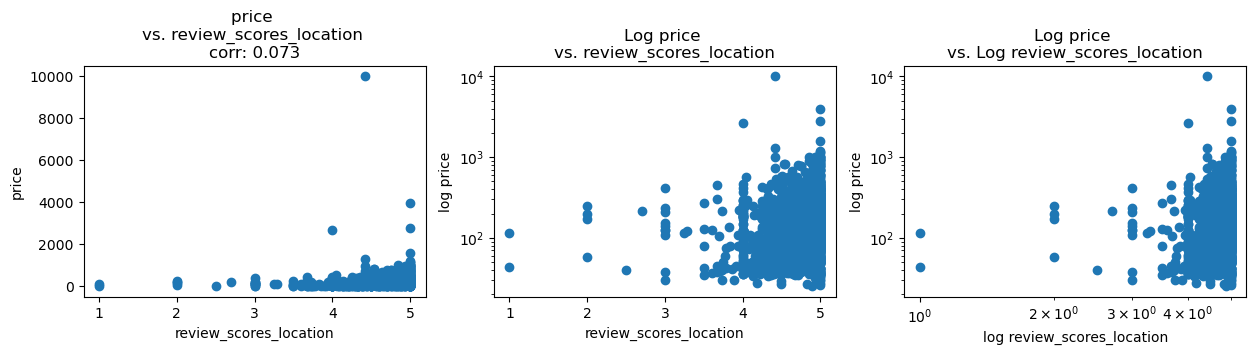

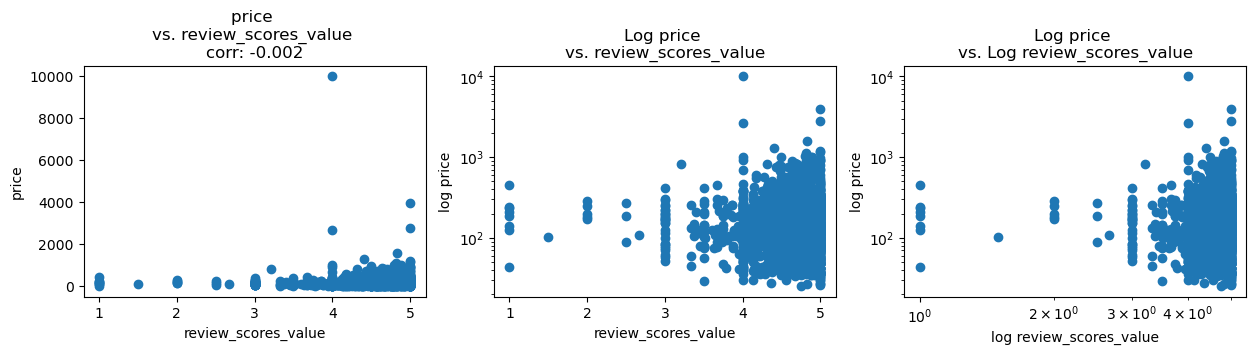

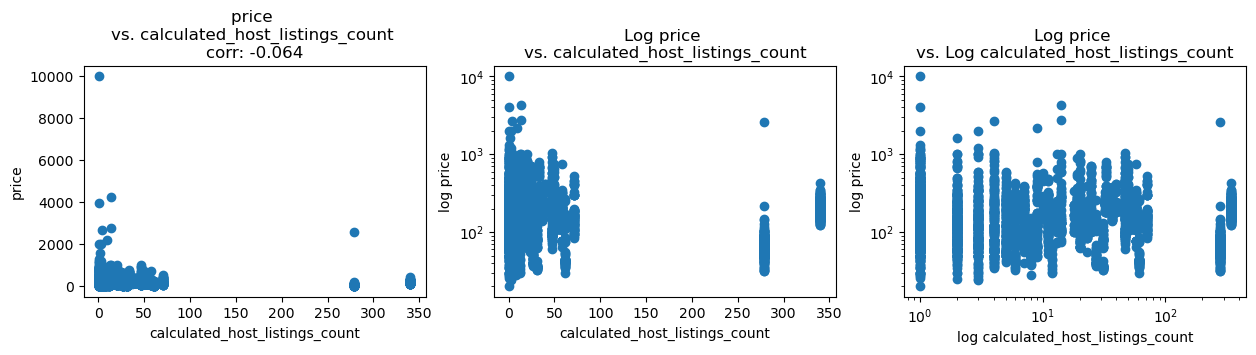

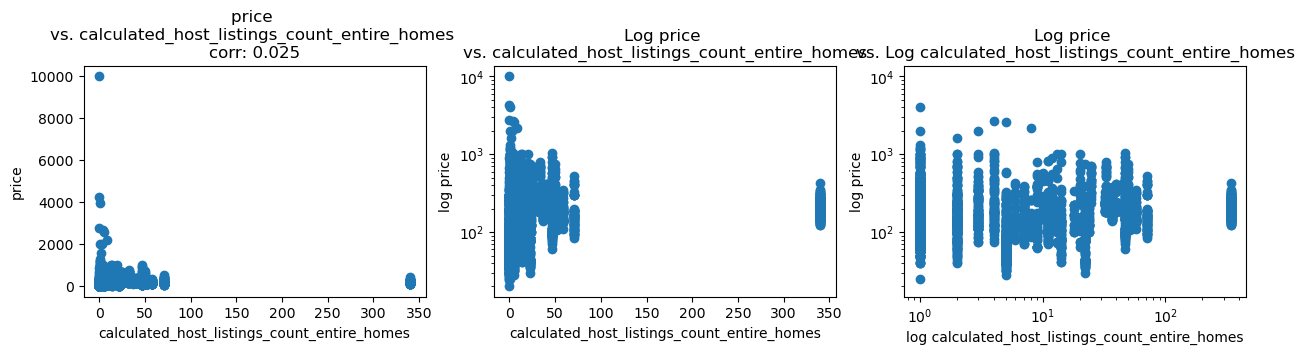

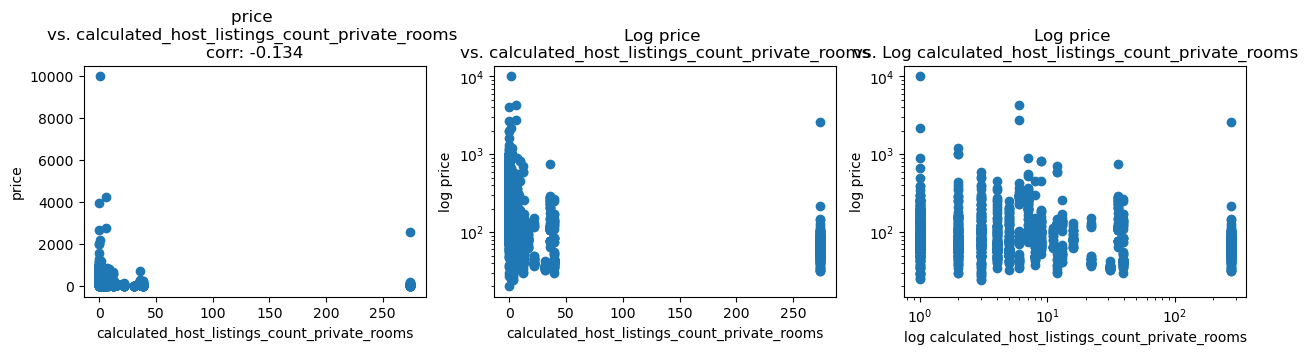

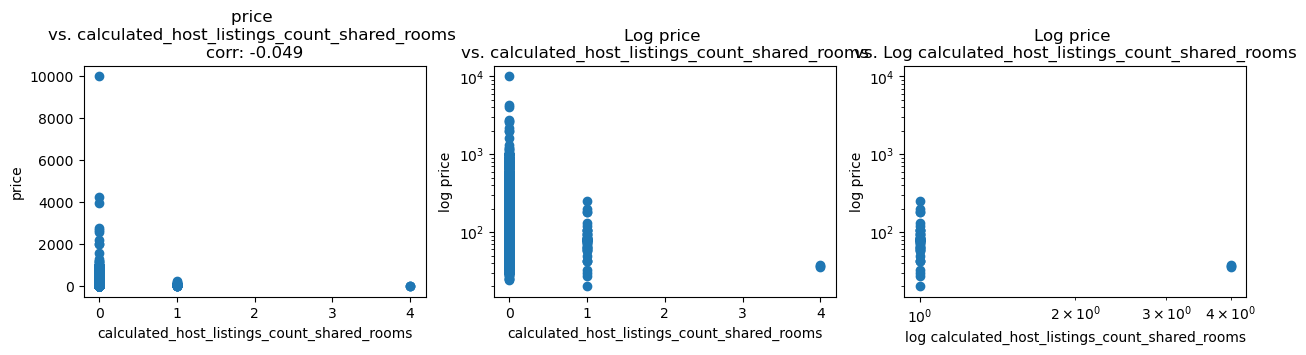

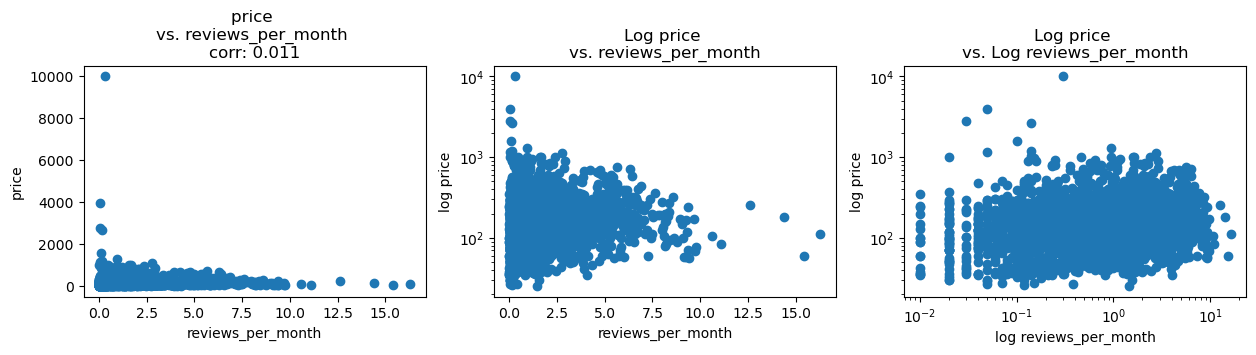

In [25]:
for i in num_cols:
    #plot_vs(lstn[i], lstn['price'], size = (6,2))
    plot_vs_log(lstn[i], lstn.price, size = (15, 3))

#### OBSERVATIONS:
* The price appears to correlate most strongly with how many people the listing accommodates
* The next most highly-correlated features to price are the number of beds followed by the number of bedrooms
* The next two most correlated features with correlation coefficients of approximately 0.13 are the minimum nights and the calcualted number of listings of private rooms that the host has
    * Both of these are negative correlations
    * Both also point to economies of scale, meaning that things get cheaper as:
        * The minimum number of nights increases
        * The host handles more properties
* The log plots are sometimes useful in seeing relationships that may otherwise not be apparent

## Examine Other Numerical Features
These features require some additional preparation.  Most of these features are date features which are currently object data types.  They will be converted to datetime, then to epoch time, and then to an integer to allow for a correaltion to be calculated and to be used in models.  The epoch time is useful since it removes the months, days, and years, and is a great way to represent how recent a particular date is.
* NOTE:  After some analysis, the high number of NaN values in the first and last review columns would require more time-consuming imputation methods prior to converting to datetime and ultimately epoch time.  Thus, these columns will not be included further. **The dropped columns list used to to create the 'lstn' dataframe will be (has been) updated to also remove these columns**

Other features are percentages and need to be converted to float values.

Additionally, this is a good place to add in the perentages of each type of listing that makes up each host's listing portfolio.

#### Host Since Column

In [26]:
'''
The method used below to convert to epoch time was discovered with the help of ChatGPT.
Per the lead instructor, it is ok to use ChatGPT is a search tool provided that we provide the
question that was asked:

Question:  'in python, I want to convert a pandas datetime object to epoch time'
'''

# The strings are converted to date time, then to epoch time with '.timestamp()'
# The epoch time is then divided by the product the number of hours and seconds per day
#   to get the number of days since the epoch time origin 
lstn['host_since'] = pd.to_datetime(lstn['host_since']).apply(lambda x: x.timestamp()/(3600*24))

In [27]:
lstn['host_since'].head()

0    16362.0
1    16272.0
2    17390.0
3    18806.0
4    16524.0
Name: host_since, dtype: float64

#### Host Acceptance and Reposnse Rates

In [28]:
# Find the number of null values for each column
lstn.host_acceptance_rate.isnull().sum(), lstn.host_response_rate.isnull().sum()

(410, 466)

In [30]:
'''
Since the null values are not a very big percentage of the total data (though not a small percentage either),
the data will be imputed with the median value
'''
# Convert percentages where they can be converted
lstn.host_acceptance_rate = lstn.host_acceptance_rate.apply(lambda x: pcnt_floater(x))
lstn.host_response_rate = lstn.host_response_rate.apply(lambda x: pcnt_floater(x))

In [31]:
# Use fillna to impute the median value
imp = SimpleImputer(strategy = 'median')

lstn.host_acceptance_rate = lstn.host_acceptance_rate.fillna(lstn.host_acceptance_rate.median())
lstn.host_response_rate = lstn.host_response_rate.fillna(lstn.host_response_rate.median())

#### Host Listing Percentages

In [34]:
# Chcek for nulls
for col in ['calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', ]:
    print(lstn[col].isnull().sum())

0
0
0
0


In [41]:
# Make new columsn that represent the percentages of each type for eeach listing/host
lstn['pcnt_ent_homes'] = round(lstn['calculated_host_listings_count_entire_homes'] / lstn['calculated_host_listings_count'], 3)
lstn['pcnt_private'] = round(lstn['calculated_host_listings_count_private_rooms'] / lstn['calculated_host_listings_count'], 3)
lstn['pcnt_shared'] = round(lstn['calculated_host_listings_count_shared_rooms'] / lstn['calculated_host_listings_count'], 3)

#### Run Plots on Modified/New Numerical Columns

In [42]:
# Make a list of columns to iterate over:
new_num_cols = ['host_since', 'host_acceptance_rate', 'host_response_rate', 'pcnt_ent_homes', 'pcnt_private', 'pcnt_shared']

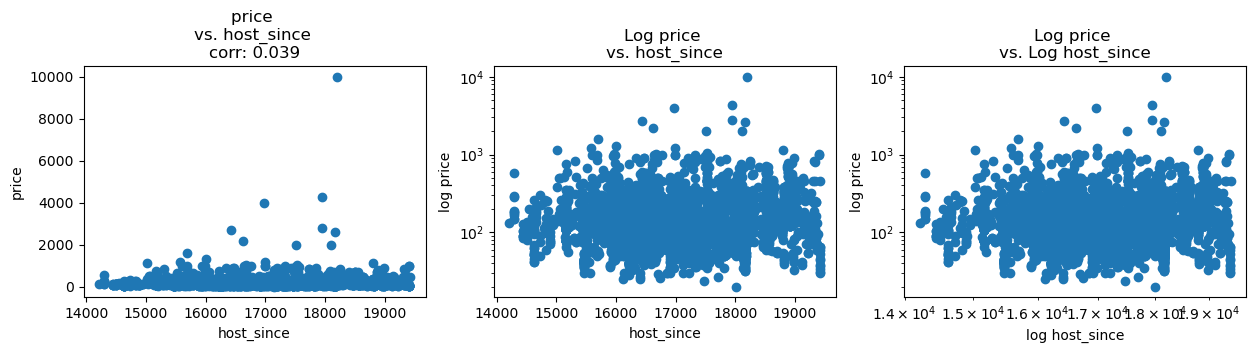

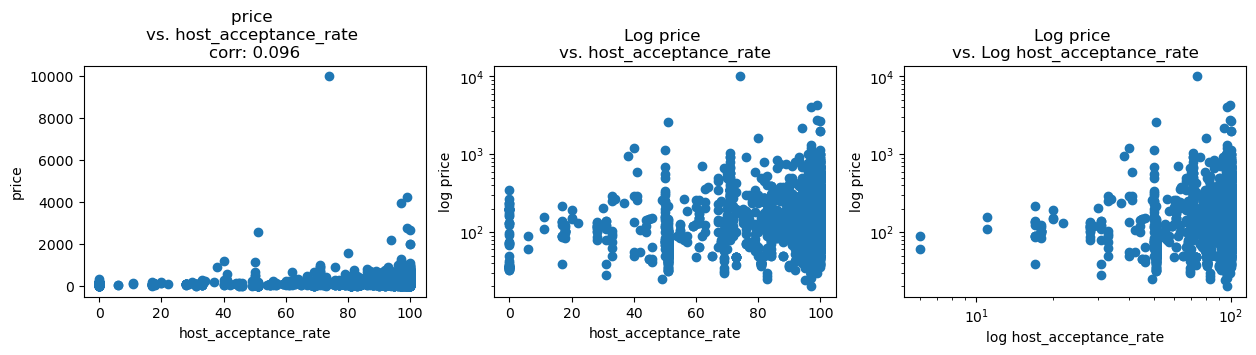

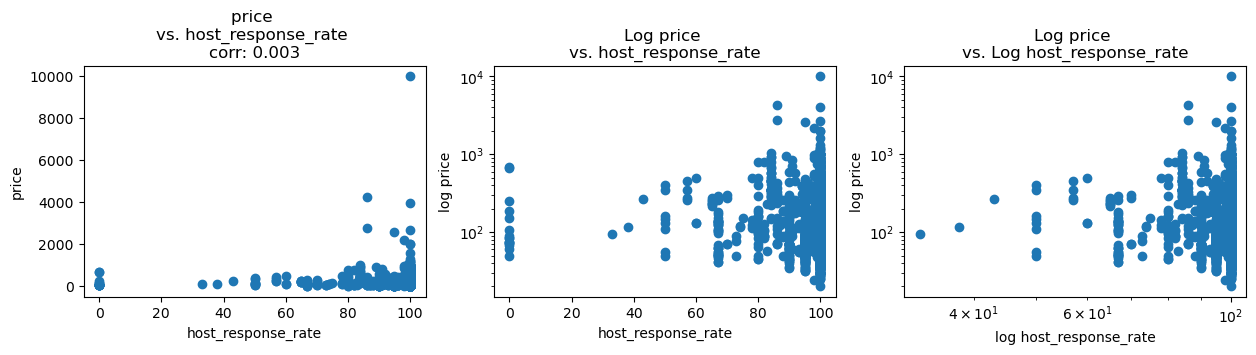

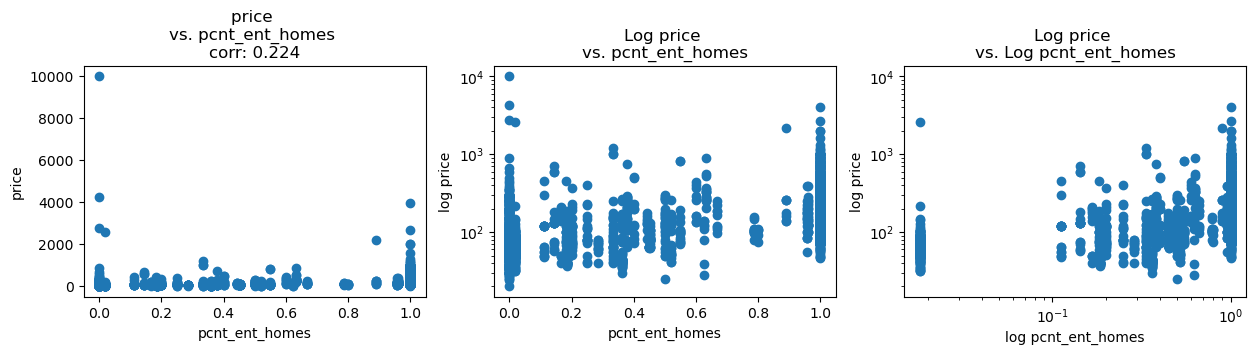

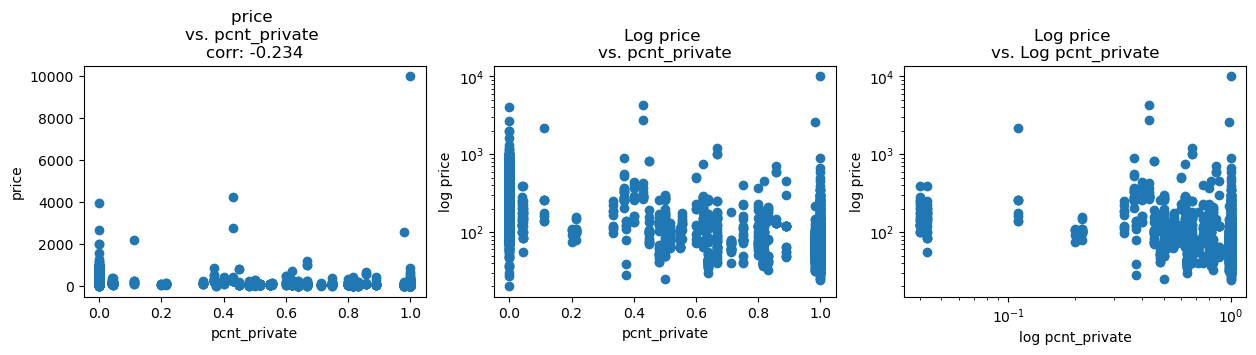

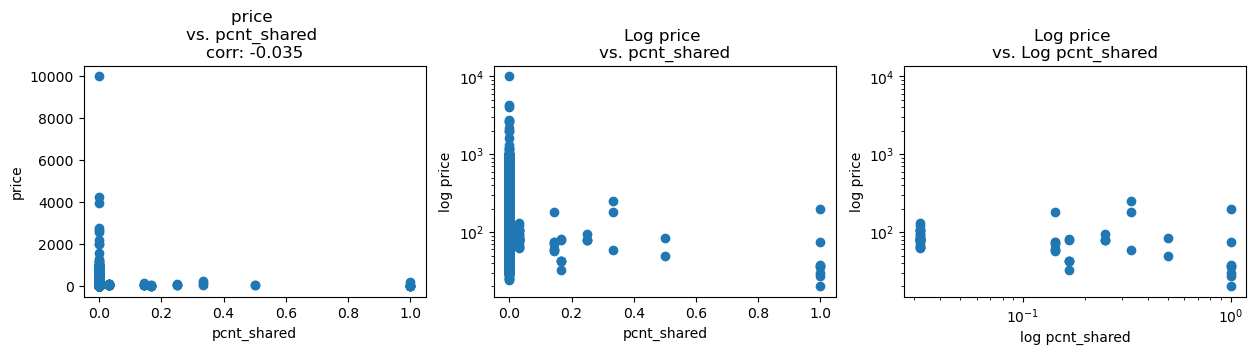

In [43]:
# Running ploting function through loop
for i in new_num_cols:
    plot_vs_log(lstn[i], lstn.price, size = (15, 3))

#### OBSERVATIONS:
* The host's percatages of entire home listings and private room listings seem to correlate comparatively well to the listing price

## Explore Categorical Features

In [48]:
# Create a a list of catgorical features
set(lstn.columns) - set(num_cols)

{'amenities',
 'bathrooms_text',
 'description',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_location',
 'host_neighbourhood',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_verifications',
 'id',
 'instant_bookable',
 'license',
 'name',
 'neighborhood_overview',
 'neighbourhood_cleansed',
 'pcnt_ent_homes',
 'pcnt_private',
 'pcnt_shared',
 'property_type',
 'room_type'}

In [50]:
'''
The following features from the above avhe been investigated previously with 
the help of the data dictionary list will be explored later in greater detail:
* amenities              - complex text data, requires special handling
* description            - complex text data, requires special handling
* host_about             - complex text data, requires special handling
* name                   - complex text data, requires special handling
* neighborhood_overview  - complex text data, requires special handling
* host_location          - values require special encoding
* host_neighbourhood     - values require special encoding 

These will be ignored as they were already processed or are not needed:
* host_acceptance_rate
* host_id
* host_response_rate
* host_since
* id
* pcnt_ent_homes
* pcnt_private
* pcnt_shared
'''

# Create a list of categorical columns to be processed
cat_cols = [
 'bathrooms_text',
 'has_availability',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_time',
 'host_verifications',
 'instant_bookable',
 'license',
 'neighbourhood_cleansed',
 'property_type',
 'room_type'
]

In [51]:
# See how many of each feature there are:
for col in cat_cols:
    print(f'{col}: {lstn[col].nunique()}')

bathrooms_text: 22
has_availability: 2
host_has_profile_pic: 2
host_identity_verified: 2
host_is_superhost: 2
host_response_time: 4
host_verifications: 5
instant_bookable: 2
license: 1044
neighbourhood_cleansed: 25
property_type: 39
room_type: 4


In [52]:
# Explore 'license' because there are so many unique values:
lstn.license

0                                                     NaN
1                                                     NaN
2                                              STR-414689
3                Exempt: This listing is a hotel or motel
4       Exempt: This listing is a unit that has contra...
                              ...                        
3472                                                  NaN
3473    Exempt: This listing is a unit used for furnis...
3474                                                  NaN
3475                                                  NaN
3476                                           STR-461452
Name: license, Length: 3477, dtype: object

In [56]:
lstn.license.value_counts()[0:50]

Exempt: This listing is a unit used for furnished institutional or business stays    194
Exempt: This listing is a hotel or motel                                             178
Exempt: This listing is a unit that has contracts with hospitals                     169
Approved by government                                                                42
STR-439290                                                                            23
STR-460218                                                                            18
STR-423861                                                                            13
LB-101723                                                                              9
STR-460830                                                                             8
STR-488469                                                                             8
STR439290                                                                              7
LB-101745            

#### OBSERVATION:
'License' needs to be evaluated separately from the other features.

The following sources provide additional information regarding the STR values above:
* https://www.boston.gov/departments/inspectional-services/short-term-rentals
* https://www.airbnb.com/help/article/859

In [59]:
# Remove license from the list
#  Source for help:  https://www.programiz.com/python-programming/methods/list/remove
cat_cols.remove('license')

In [61]:
# Count null values for each column:
for col in cat_cols:
    print(f'{col}: {lstn[col].isnull().sum()}')

bathrooms_text: 1
has_availability: 0
host_has_profile_pic: 0
host_identity_verified: 0
host_is_superhost: 1
host_response_time: 466
host_verifications: 0
instant_bookable: 0
neighbourhood_cleansed: 0
property_type: 0
room_type: 0


In [82]:
# Impute values for bathromms_text
lstn.bathrooms_text.fillna(lstn.bathrooms_text.mode()[0], inplace = True)

In [66]:
# check out values for host_is_superhost
lstn.host_is_superhost.value_counts()

f    2606
t     870
Name: host_is_superhost, dtype: int64

In [67]:
#Impute false (f) for host is superhost
lstn.host_is_superhost.fillna('f', inplace = True)

In [71]:
# Checl out host response time
lstn.host_response_time.value_counts()

within an hour        2338
within a few hours     492
within a day           162
a few days or more      19
Name: host_response_time, dtype: int64

In [72]:
# Fill NaN values with '0 - not listed'
#  The '0' is included to make this variable the first variable alphabetically
#   and thus the one that would be dropped after one hot encoding
lstn.host_response_time.fillna('0 - not listed', inplace = True)

In [83]:
# Count null values for each column:
for col in cat_cols:
    print(f'{col}: {lstn[col].isnull().sum()}')

bathrooms_text: 0
has_availability: 0
host_has_profile_pic: 0
host_identity_verified: 0
host_is_superhost: 0
host_response_time: 0
host_verifications: 0
instant_bookable: 0
neighbourhood_cleansed: 0
property_type: 0
room_type: 0


In [87]:
cat_cols

['bathrooms_text',
 'has_availability',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_time',
 'host_verifications',
 'instant_bookable',
 'neighbourhood_cleansed',
 'property_type',
 'room_type']

In [97]:
# Make a copy dataframe with the columns above and the price for preliminary encoding
lstn_ohe = lstn[cat_cols].copy()
lstn_ohe['price'] = lstn.price.copy()

# One hot encode with get dummies and drop first for linear model
lstn_ohe = pd.get_dummies(lstn_ohe, drop_first=True)
lstn_ohe.shape

(3477, 100)

In [100]:
# Find correlations to price between all variables one hot encoded above
lstn_ohe.corr()['price'].sort_values(ascending=False)

price                                        1.000000
bathrooms_text_2 baths                       0.210484
bathrooms_text_4 baths                       0.171760
property_type_Entire home                    0.165018
bathrooms_text_2.5 baths                     0.133712
                                               ...   
bathrooms_text_0 shared baths               -0.110098
property_type_Private room in home          -0.121260
bathrooms_text_1 shared bath                -0.137802
property_type_Private room in rental unit   -0.210368
room_type_Private room                      -0.246417
Name: price, Length: 100, dtype: float64

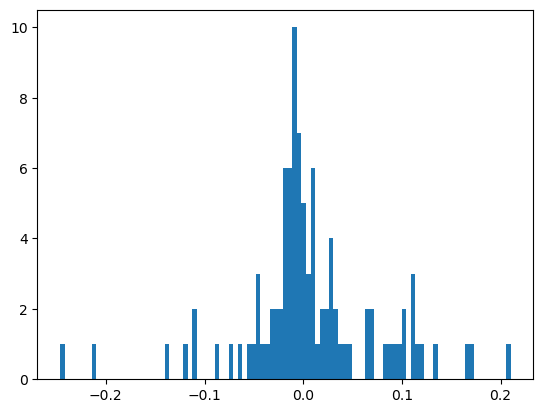

In [105]:
# View all correlations in a histogram.  Exclude price as that correlation is always 1
plt.hist(lstn_ohe.corr()['price'][1:-1].sort_values(ascending=False), bins = 99);